In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files


# Useful links

## Your TP notes https://github.com/lanastazia/OPSD_sample_data

**numpy** https://www.numpy.org/

**pandas** https://pandas.pydata.org/

**matplotlib** https://matplotlib.org/

**colab** https://colab.research.google.com/notebooks/welcome.ipynb![alt text](https://)

# **Getting the data**
The data is released by Open Power System Data plateforme under Creative Commons Attribution-International license, based on consumptuon and production of several German small business households.


In [0]:
uploaded = files.upload()

Saving ProductionConsumptionGermanIndustrialParc.csv to ProductionConsumptionGermanIndustrialParc (1).csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['ProductionConsumptionGermanIndustrialParc.csv']))
data.head(3)

,Unnamed: 0,timestamp,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
0,0,2015-04-15T11:15:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-04-15T11:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-04-15T11:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.info()

In [0]:
data.columns

In [0]:
data.index = data.timestamp
data.index = pd.to_datetime(data.index)
data = data.drop(['Unnamed: 0', 'timestamp'], axis=1)
data.head()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-15 11:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.tail(10)

In [0]:
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-15 11:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing values



In [0]:
data.describe()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
count,33707.000000,33706.000000,33705.000000,33704.000000,33704.000000,33707.000000,33707.000000,33706.000000,30317.000000,23488.000000,33704.000000,33704.000000,33704.000000,33705.000000,33704.000000,33707.000000,33707.000000,33707.000000,33707.000000,33076.000000,33707.000000
mean,8731.412109,3255.681667,14947.721703,2990.329035,19904.222392,25574.609593,31574.745890,90801.978879,446.376099,516.478954,69466.333105,105599.754069,231.304634,20407.996042,2971.884102,348697.167950,13271.571927,3976.834362,9313.495483,232.793381,95437.182301
std,2773.069760,1143.938678,5036.932613,1026.199684,7581.482268,9161.044188,23642.053964,34294.780697,154.999430,199.245426,24856.955356,38413.857937,63.298112,8136.959831,988.954818,207292.226635,6468.869198,1778.311599,4696.745840,90.157228,30236.294335
min,3759.995000,1277.925000,6089.124000,1098.580000,7643.094000,9895.703000,903.000000,34104.531000,172.405000,0.000000,26460.125000,41887.938000,109.762000,7213.219000,1264.338000,2.750000,2171.965000,881.301000,1309.418000,78.431000,38641.406000
25%,6398.177500,2239.650000,10539.814000,2097.767500,13176.594000,17525.961000,4034.234500,59137.843750,304.542000,344.689000,47536.913750,71864.062500,175.352000,13268.234000,2070.544000,161365.750000,7273.422000,2437.961000,4854.215000,152.705750,72901.687500
50%,8758.806000,3310.597500,14992.199000,3093.405000,19725.484000,25963.438000,36019.188000,91402.203500,455.389000,538.367000,69979.719000,102145.812000,229.633000,20968.812000,3053.825000,350041.000000,14476.086000,4092.930000,10401.910000,229.194500,94176.625000
75%,11168.252500,4339.840000,19652.850000,3875.282500,26561.406000,33785.180000,56236.843500,122799.336000,571.342000,718.032000,92266.624750,140863.327750,281.121000,27336.562000,4003.126500,535961.750000,19949.019500,5797.672000,14170.105500,310.397750,118720.156000
max,13424.025000,5040.495000,23093.750000,4627.730000,32626.156000,40275.797000,56638.219000,146264.156000,711.110000,718.032000,110523.781000,172840.375000,378.812000,33756.562000,4184.906000,695060.750000,20748.281000,6264.996000,14502.074000,381.981000,154614.750000


In [0]:
for col, row in data.items():
  print("First non NaN value for column '{}' is at index {}".format(col, row.first_valid_index()))
 

First non NaN value for column 'offices' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'chemistry_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'clean_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'printing_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'printing_room.1' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'compressor' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'cooling_aggregate' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'cooling_pumps' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'dishwasher' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'electric_vehicle' is at index 2016-03-27 12:00:00+00:00
First non NaN value for column 'facility_cvd_centrotherm' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'facility_diffusion_centroth

In [0]:
full_data = data['2016-02-11 10:15:00':'2017-02-09 10:45:00']
full_data.head(10)

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-02-11 10:15:00+00:00,3759.995,1277.925,6089.124,1098.580,7643.094,9895.703,903.000,34104.531,172.405,NaN,26460.125,41887.938,109.762,7213.219,1264.338,2.75,2171.965,881.301,1309.418,78.431,38641.406
2016-02-11 10:30:00+00:00,3760.466,1278.485,6090.070,1099.480,7648.000,9896.859,903.031,34107.156,172.405,NaN,26462.562,41891.000,109.762,7213.281,1264.420,34.50,2174.371,882.312,1310.816,78.439,38654.062
2016-02-11 10:45:00+00:00,3761.016,1280.005,6091.005,1100.390,7652.812,9898.016,903.062,34110.375,172.405,NaN,26465.344,41895.625,109.762,7213.359,1264.504,70.50,2177.055,883.432,1312.381,78.460,38667.594
2016-02-11 11:00:00+00:00,3761.465,1281.690,6092.521,1101.285,7657.641,9899.266,903.094,34113.688,172.405,NaN,26467.812,41899.438,109.762,7213.422,1264.584,104.75,2179.922,884.621,1314.057,78.476,38680.344
2016-02-11 11:15:00+00:00,3761.971,1282.465,6094.040,1102.190,7662.438,9900.422,903.172,34116.938,172.405,NaN,26470.250,41902.250,109.762,7213.500,1264.670,137.25,2182.910,885.867,1315.799,78.477,38692.281
2016-02-11 11:30:00+00:00,3762.440,1283.115,6095.399,1103.085,7667.250,9901.578,903.188,34120.250,172.405,NaN,26475.031,41906.188,109.762,7213.562,1264.748,172.00,2185.965,887.143,1317.578,78.478,38704.219
2016-02-11 11:45:00+00:00,3763.000,1283.655,6096.715,1103.980,7672.047,9902.781,903.250,34123.500,172.405,NaN,26477.656,41909.125,109.762,7213.656,1264.830,204.00,2189.117,888.441,1319.434,78.486,38716.094
2016-02-11 12:00:00+00:00,3763.706,1284.095,6097.704,1104.880,7676.836,9903.875,903.281,34126.812,172.405,NaN,26480.188,41912.125,109.762,7213.969,1264.914,235.50,2192.344,889.775,1321.324,78.507,38727.875
2016-02-11 12:15:00+00:00,3764.235,1284.360,6098.675,1105.770,7681.734,9906.234,903.344,34130.062,172.405,NaN,26482.656,41915.062,109.762,7222.531,1264.994,278.75,2195.250,890.977,1323.031,78.522,38740.000


# Missing values rate per feature


In [0]:
percent_missing = full_data.isnull().sum() * 100 / len(full_data)

missing_value_df = pd.DataFrame({'column_name': full_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False, inplace=True)
missing_value_df

,column_name,percent_missing
electric_vehicle,electric_vehicle,32.789653
dishwasher,dishwasher,13.248634
refrigerator,refrigerator,5.353822
facility_cvd_centrotherm,facility_cvd_centrotherm,3.556815
printing_room,printing_room,3.556815
printing_room.1,printing_room.1,3.556815
facility_diffusion_centrotherm,facility_diffusion_centrotherm,3.556815
facility_diffusion_tecnofirmes,facility_diffusion_tecnofirmes,3.556815
facility_indus_rena,facility_indus_rena,3.556815
clean_room,clean_room,3.553953


# Help yourself with visualization 


# Hmmm... how can you optimze the operation above ?

In [0]:
def plot_df(df, title):
  df.plot(title=(title), figsize=(15,10), lw=2)
  plt.xlabel('Date')
  plt.ylabel('Power (W)')
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

In [0]:
def compute_missing_rate(df):
  missing_rate = df.isnull().sum() / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'missing_rate': missing_rate})
  missing_value_df.sort_values('missing_rate', ascending = False, inplace=True)
  return missing_value_df

In [0]:
clean_df = full_data.interpolate(method ='linear', limit_direction ='forward').fillna(method='bfill')

In [0]:
clean_df.columns

Index(['offices', 'chemistry_room', 'clean_room', 'printing_room',
       'printing_room.1', 'compressor', 'cooling_aggregate', 'cooling_pumps',
       'dishwasher', 'electric_vehicle', 'facility_cvd_centrotherm',
       'facility_diffusion_centrotherm', 'facility_diffusion_tecnofirmes',
       'facility_furnace_centrotherm', 'facility_indus_rena', 'grid_import',
       'solar_production', 'solar_production_facade', 'solar_production_roof',
       'refrigerator', 'ventilation'],
      dtype='object')

# Create three functional dataframes : consumption, production and grid import


In [0]:
consumption_cum_df = clean_df[['offices', 'chemistry_room', 'clean_room', 'printing_room',
       'printing_room.1', 'compressor', 'cooling_aggregate', 'cooling_pumps',
       'dishwasher', 'electric_vehicle', 'facility_cvd_centrotherm',
       'facility_diffusion_centrotherm', 'facility_diffusion_tecnofirmes',
       'facility_furnace_centrotherm', 'facility_indus_rena', 
       'refrigerator', 'ventilation']]
production_cum_df = clean_df[['solar_production', 'solar_production_facade', 'solar_production_roof']]
grid_impor_cum_df = clean_df[['grid_import']]

In [0]:
consumption_df = consumption_cum_df.diff()
production_df = production_cum_df.diff()
grid_import_df = grid_impor_cum_df.diff()

In [0]:
consumption_df.describe()

# What type of methods for handling outliers ?

In [0]:
def where_arbitrary_quantile(df, percent):
  high_quantile = df.quantile(percent)
  high_outliers = (df > high_quantile)
  return df.where(~high_outliers, high_quantile, axis=1)


def where_iqr(df):
  q_25 = df.quantile(0.25)
  q_75=df.quantile(0.75)
  iqr=q_75-q_25
  high_quantile = q_75+iqr*1.5
  high_outliers = (df>q_75+iqr*1.5)
  return df.where(~high_outliers, high_quantile, axis=1)

# Let's create global metrics and analyze them

In [0]:
production_wo_outliers = where_arbitrary_quantile(production_df, 0.9997)

In [0]:
production_wo_outliers['global_production'] = production_wo_outliers['solar_production_roof']+production_wo_outliers['solar_production_facade']
production_wo_outliers = production_wo_outliers.drop(['solar_production'], axis=1)
production_wo_outliers

In [0]:
consumption_wo_outliers['global_consumption'] = consumption_wo_outliers.sum(axis=1)

In [0]:
global_df = consumption_wo_outliers[['global_consumption']].join(production_wo_outliers[['global_production']]).join(grid_import_wo_outliers)
global_df.head()

,global_consumption,global_production,grid_import
timestamp,,,
2016-02-11 10:15:00+00:00,0.000,NaN,NaN
2016-02-11 10:30:00+00:00,29.902,2.409,31.75
2016-02-11 10:45:00+00:00,34.256,2.685,36.00
2016-02-11 11:00:00+00:00,33.159,2.865,34.25
2016-02-11 11:15:00+00:00,30.338,2.988,32.50


In [0]:
import seaborn as sns
dist = sns.pairplot(global_df)
dist.fig.set_size_inches(12,12)

# Time series analysis
## Stationarity of time series data

**statsmodels** https://www.statsmodels.org/

In [0]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test \n Null hypothezsis states that the time series are non-stationary, and the alternative hypothesis states that time series are stationary')
ad_fuller_stat = adfuller(global_df['global_consumption'].resample('d').mean().fillna(method="bfill"), autolag='AIC')
plot_ad_fuller = pd.Series(ad_fuller_stat[0:4],index=['Test statistics','p-value','number of lags used','number of observations'])
for key,value in ad_fuller_stat[4].items():
    plot_ad_fuller['Critical value (%s)'%key] = value
print(plot_ad_fuller)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dickey Fuller Test 
 Null hypothezsis states that the time series are non-stationary, and the alternative hypothesis states that time series are stationary
Test statistics            -3.082505
p-value                     0.027875
number of lags used        14.000000
number of observations    350.000000
Critical value (1%)        -3.449173
Critical value (5%)        -2.869833
Critical value (10%)       -2.571188
dtype: float64


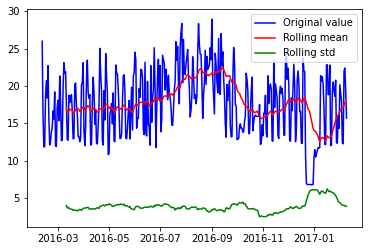

In [0]:
data_to_plot = global_df['global_consumption'].resample('d').mean().fillna(method="bfill")
ma =  data_to_plot.rolling(30).mean()
mstd = data_to_plot.rolling(30).std()

plt.plot(data_to_plot, color = 'blue', label = "Original value")
plt.plot(ma, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
consumption_decomposed= sm.tsa.seasonal_decompose(global_df['global_consumption'].resample('D').mean())
fig = consumption_decomposed.plot()
plt.show()

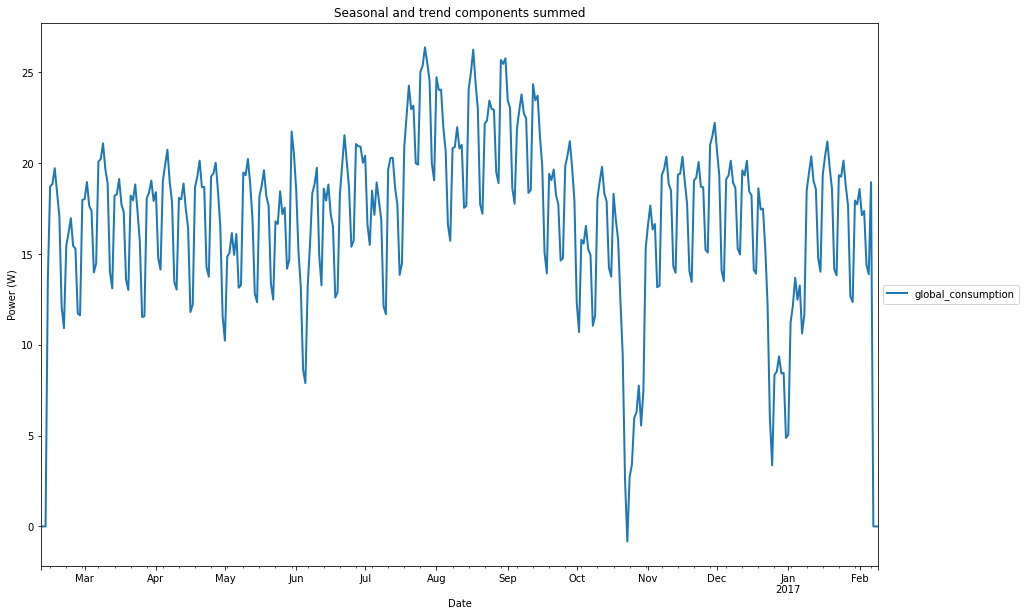

In [0]:
plot_df((consumption_decomposed.trend+consumption_decomposed.seasonal).fillna(0), "Seasonal and trend components summed")

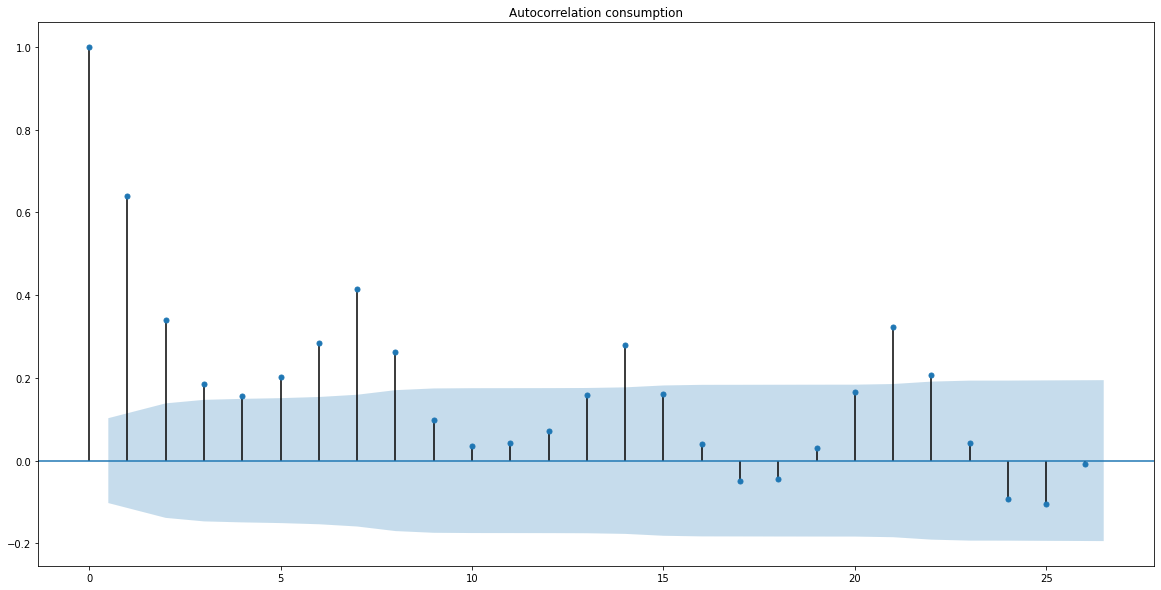

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
a=plot_acf(global_df['global_consumption'].resample('D').mean(), title= 'Autocorrelation consumption')

# Simplest predictive modeling

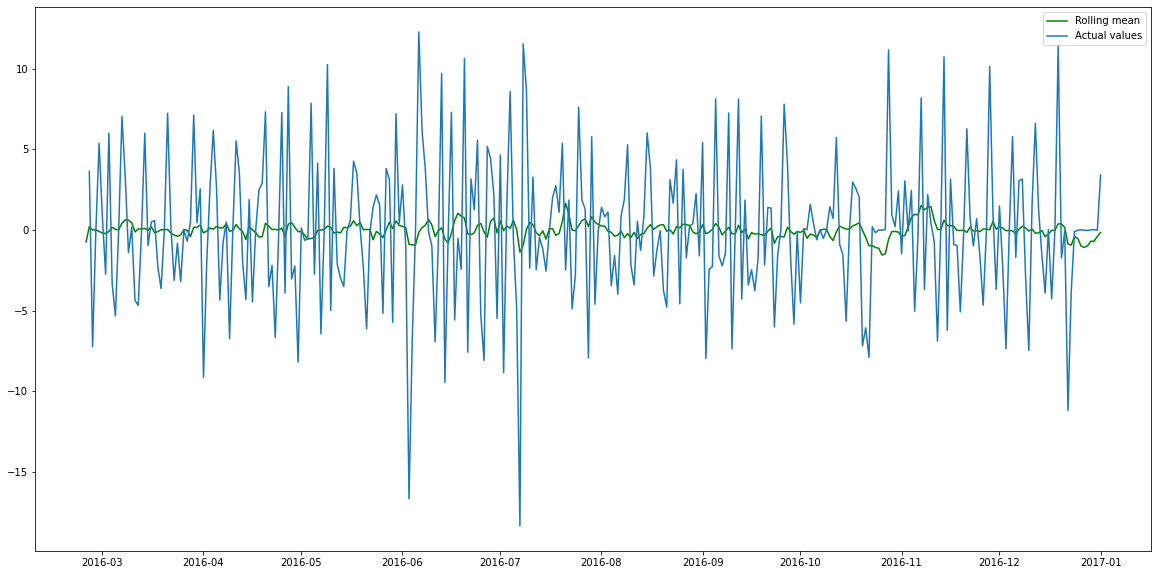

In [0]:
rolling_mean = resampled_by_day_consumption["global_consumption_stationary"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].rolling(14).mean()
plt.plot(rolling_mean, "g", label="Rolling mean")
plt.plot(resampled_by_day_consumption["global_consumption_stationary"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'][14:], label="Actual values")
plt.legend(loc="best")

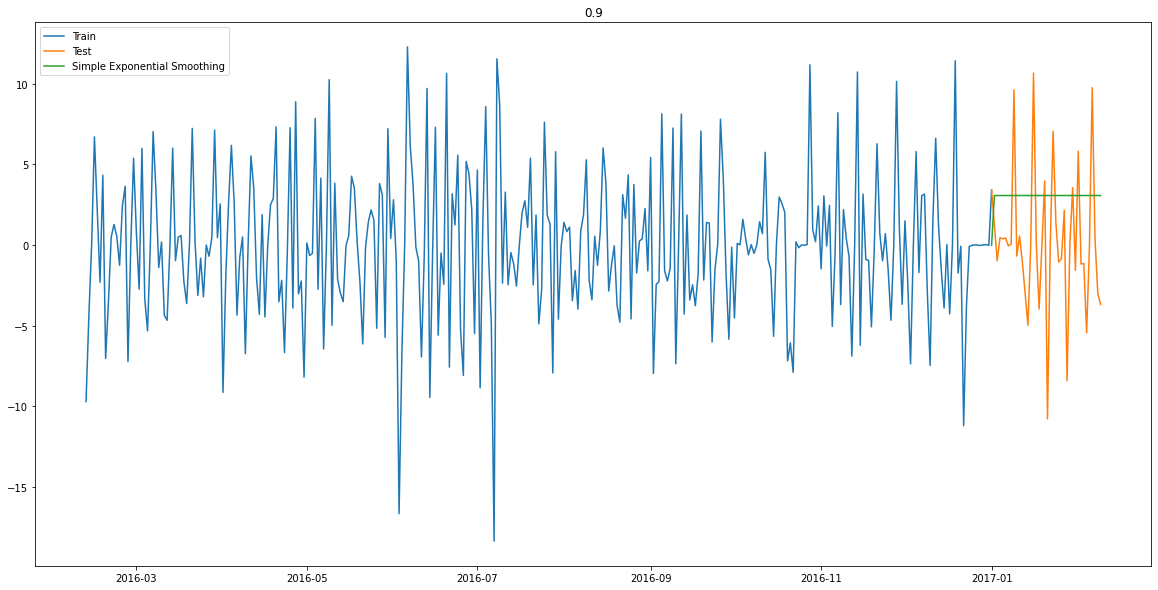

In [0]:
from statsmodels.tsa.api import SimpleExpSmoothing

train, test = resampled_by_day_consumption["global_consumption_lagged_once"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), resampled_by_day_consumption["global_consumption_lagged_once"]['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)

rcParams['figure.figsize'] = 20, 10
# Simple Exponential Smoothing
model = SimpleExpSmoothing(train).fit(smoothing_level=0.9)
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.title(model.model.params['smoothing_level'])
# plot
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
#plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Simple Exponential Smoothing')
plt.legend(loc='best')

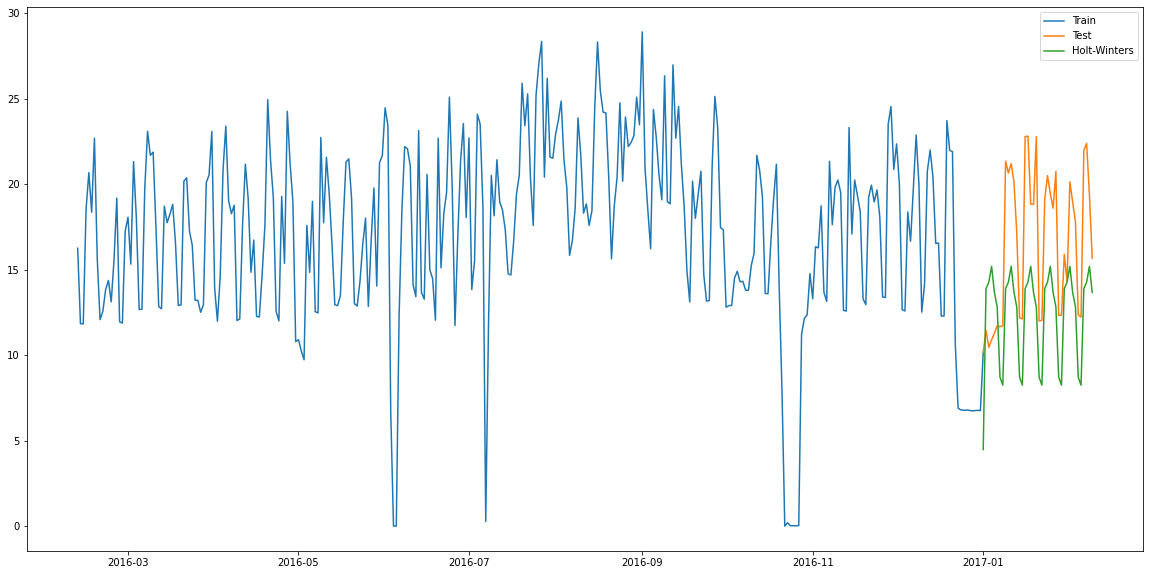

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing

train, test = resampled_by_day_consumption["global_consumption"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), resampled_by_day_consumption["global_consumption"]['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)
model = ExponentialSmoothing(train, seasonal='add', trend='add',seasonal_periods=7).fit(use_boxcox=True)
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
#plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

# Feature engineering and prediction with other algorithms


In [0]:
dataset = resampled_by_day_consumption[["global_consumption"]]
dataset.columns = ["target"]
for i in range(7, 14):
    dataset["t-{}".format(i)] = dataset.target.shift(i)
dataset.head(15)

,target,t-7,t-8,t-9,t-10,t-11,t-12,t-13
timestamp,,,,,,,,
2016-02-11 00:00:00+00:00,25.981200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-12 00:00:00+00:00,16.263229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-13 00:00:00+00:00,11.846240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-14 00:00:00+00:00,11.843146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-15 00:00:00+00:00,18.551052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-16 00:00:00+00:00,20.687561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-17 00:00:00+00:00,18.373552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-18 00:00:00+00:00,22.703860,25.981200,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-19 00:00:00+00:00,15.661969,16.263229,25.981200,NaN,NaN,NaN,NaN,NaN


In [0]:
dataset=dataset.iloc[13:]
dataset.head()

,target,t-7,t-8,t-9,t-10,t-11,t-12,t-13
timestamp,,,,,,,,
2016-02-24 00:00:00+00:00,13.125973,18.373552,20.687561,18.551052,11.843146,11.846240,16.263229,25.981200
2016-02-25 00:00:00+00:00,15.560219,22.703860,18.373552,20.687561,18.551052,11.843146,11.846240,16.263229
2016-02-26 00:00:00+00:00,19.197583,15.661969,22.703860,18.373552,20.687561,18.551052,11.843146,11.846240
2016-02-27 00:00:00+00:00,11.959687,12.086052,15.661969,22.703860,18.373552,20.687561,18.551052,11.843146
2016-02-28 00:00:00+00:00,11.887594,12.568146,12.086052,15.661969,22.703860,18.373552,20.687561,18.551052


In [0]:
dataset["weekday"] = dataset.index.weekday
dataset['weekend'] = dataset.weekday.isin([5,6])*1
dataset.head()

,target,t-7,t-8,t-9,t-10,t-11,t-12,t-13,weekday,weekend
timestamp,,,,,,,,,,
2016-02-24 00:00:00+00:00,13.125973,18.373552,20.687561,18.551052,11.843146,11.846240,16.263229,25.981200,2,0
2016-02-25 00:00:00+00:00,15.560219,22.703860,18.373552,20.687561,18.551052,11.843146,11.846240,16.263229,3,0
2016-02-26 00:00:00+00:00,19.197583,15.661969,22.703860,18.373552,20.687561,18.551052,11.843146,11.846240,4,0
2016-02-27 00:00:00+00:00,11.959687,12.086052,15.661969,22.703860,18.373552,20.687561,18.551052,11.843146,5,1
2016-02-28 00:00:00+00:00,11.887594,12.568146,12.086052,15.661969,22.703860,18.373552,20.687561,18.551052,6,1


In [0]:
train, test = dataset['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), dataset['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)

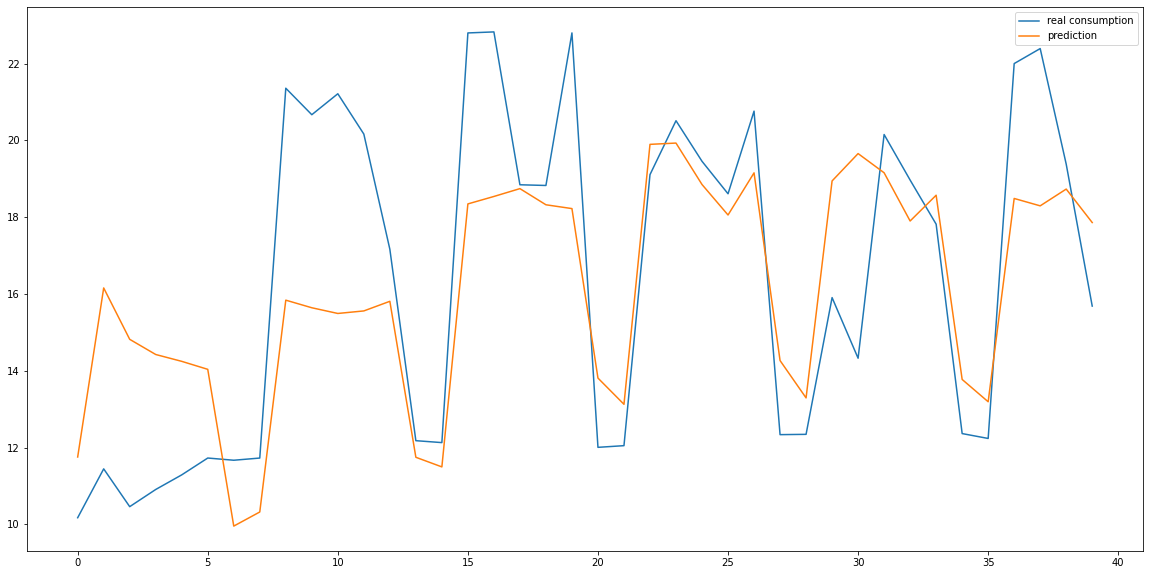

In [0]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop(['target'], axis=1))
test_scaled = scaler.transform(test.drop(['target'], axis=1))

model = LinearRegression()
model.fit(train_scaled, train['target'])

prediction = model.predict(test_scaled)
    
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real consumption")
plt.plot(prediction, label="prediction")
plt.legend()

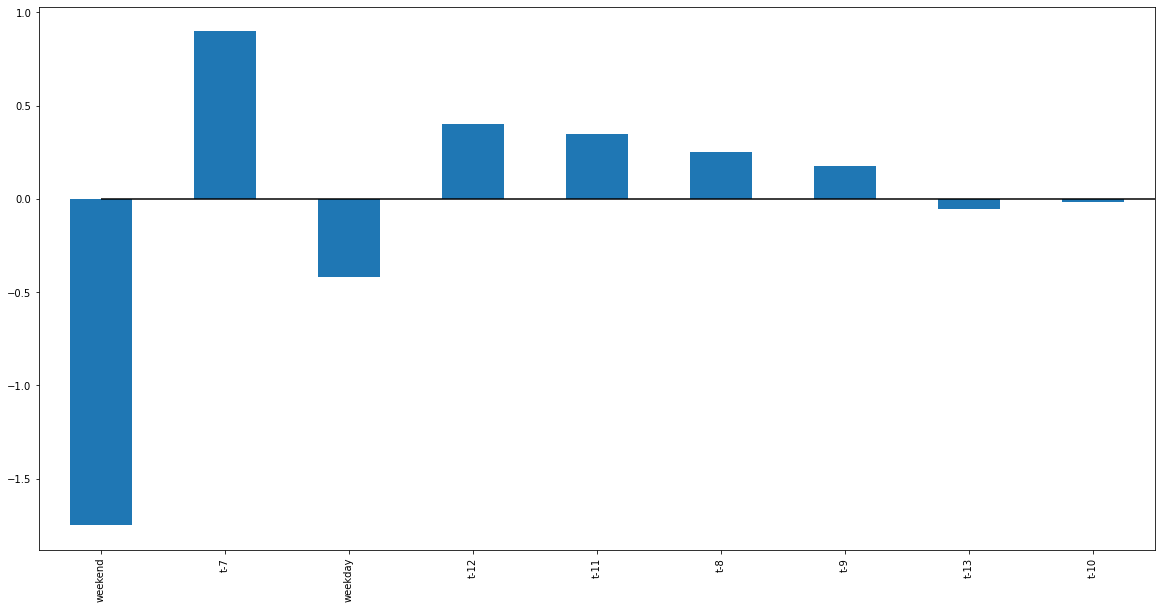

In [0]:
features_weights = pd.DataFrame(data=model.coef_, index = train.drop(['target'], axis=1).columns)
features_weights.columns = ["weights"]
features_weights["absolute_value"] = features_weights["weights"].apply(np.abs)
features_weights = features_weights.sort_values(by="absolute_value", ascending=False).drop(["absolute_value"], axis=1)
    
features_weights['weights'].plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=len(features_weights))